In [94]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [95]:
R = 2
angle = np.linspace(0.0, 2.0 * np.pi, 256)

In [96]:
x = R * np.cos(angle)
y = R * np.sin(angle)

n_theta = 5
dtheta = np.pi / n_theta
theta = np.arange(-np.pi/2, np.pi/2, dtheta)
mid_theta = (theta[1:] + theta[:-1]) * 0.5
theta_alt = np.arange(-np.pi/2 + dtheta, np.pi/2 + dtheta, dtheta)

In [97]:
def vec_angle(vec):
    x = vec[0]
    y = vec[1]
    if x > 0:
        return np.arctan(y / x)
    if x < 0 and y >= 0:
        return np.arctan(y / x) + np.pi
    if x < 0 and y < 0:
        return np.arctan(y / x) - np.pi
    if x == 0 and y > 0:
        return np.pi/2
    if x == 0 and y < 0:
        return -np.pi/2        

k3 A: 	1.1071487177940904
k1 A: 	0.5404195002705842
k2: 	2.394580435827234
mid: 2.394580435827234
match: 	True
mid mod: 	-0.7470122177625598
mod match: 	True



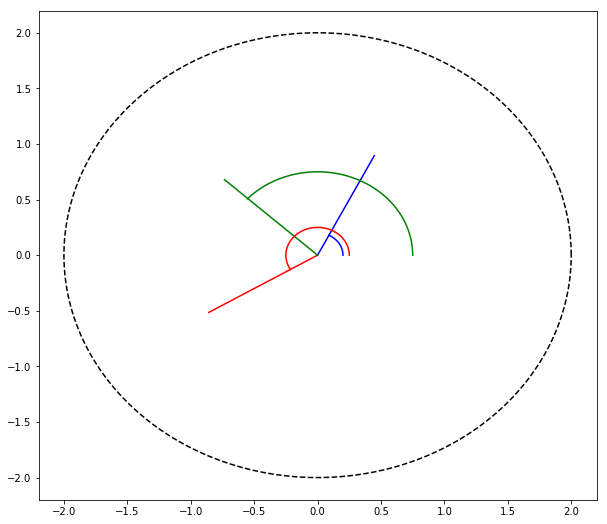

In [98]:
# %matplotlib widget

plt.figure(figsize = (10, 9))
plt.plot(x, y, 'k--')
# for t, t2, t3 in zip(theta, mid_theta, theta_alt):
#     plt.plot([0, R * np.cos(t)], [0, R * np.sin(t)], 'r--')
#     plt.plot([0, R * np.cos(t2)], [0, R * np.sin(t2)], 'b--')
#     plt.plot([0, R * np.cos(t3)], [0, R * np.sin(t3)], 'c')
k3 = np.array([32, 64])
k3 = k3/np.linalg.norm(k3)
k1 = np.array([40, 24])
k1 = k1/np.linalg.norm(k1)
k2 = k3 - k1
k2 =  k2 / np.linalg.norm(k2)
plt.plot([0, k3[0]], [0, k3[1]], 'b')
plt.plot([0, -k1[0]], [0, -k1[1]], 'r')
plt.plot([0, k2[0]], [0, k2[1]], 'g')
print("k3 A: \t{}\nk1 A: \t{}\nk2: \t{}\nmid: {}\nmatch: \t{}\nmid mod: \t{}\nmod match: \t{}".format(vec_angle(k3), 
                                                                                                      vec_angle(k1), 
                                                                                                      vec_angle(k2), 
                                                                                                      (vec_angle(k3) + vec_angle(k1) + np.pi)/2, 
                                                                                                      np.isclose(vec_angle(k2), (vec_angle(k3) + vec_angle(k1) + np.pi)/2), 
                                                                                                      np.mod((vec_angle(k3) + vec_angle(k1) + np.pi)/2+ 2.0 * np.pi, 2.0 * np.pi) - np.pi, 
                                                                                                      np.isclose(vec_angle(k2), np.mod((vec_angle(k3) + vec_angle(k1) + np.pi)/2 + 2.0 * np.pi, 2.0 * np.pi))))

print()

k3a = np.arange(0.0, vec_angle(k3) + 0.01, 0.01)
k1a = np.arange(0.0, vec_angle(k1) + np.pi + 0.01, 0.01)
k2a = np.arange(0.0, vec_angle(k2) + 0.01, 0.01)
plt.plot(0.2 * np.cos(k3a), 0.2 * np.sin(k3a), 'b')
plt.plot(0.25 * np.cos(k1a), 0.25 * np.sin(k1a), 'r')
plt.plot(0.75 * np.cos(k2a), 0.75 * np.sin(k2a), 'g')


plt.show()

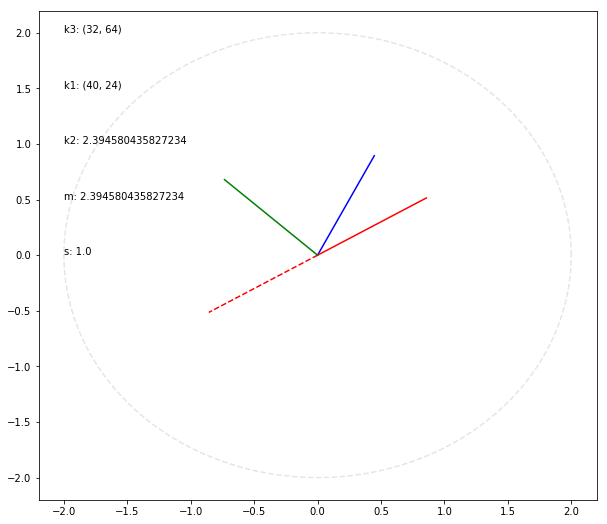

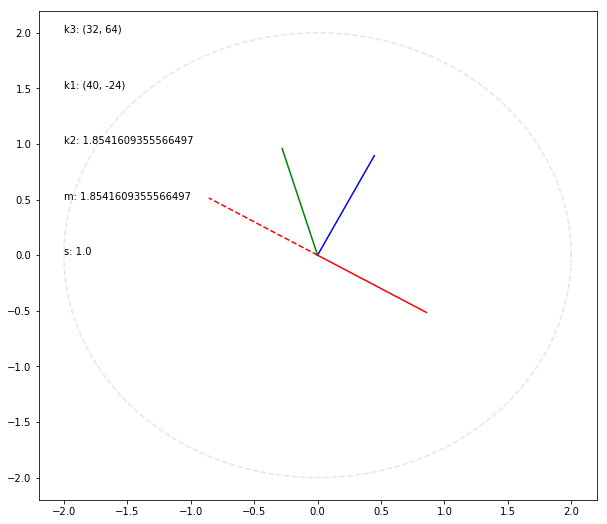

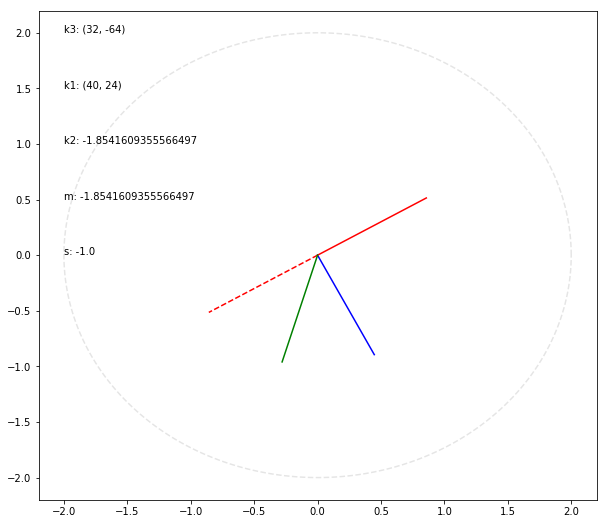

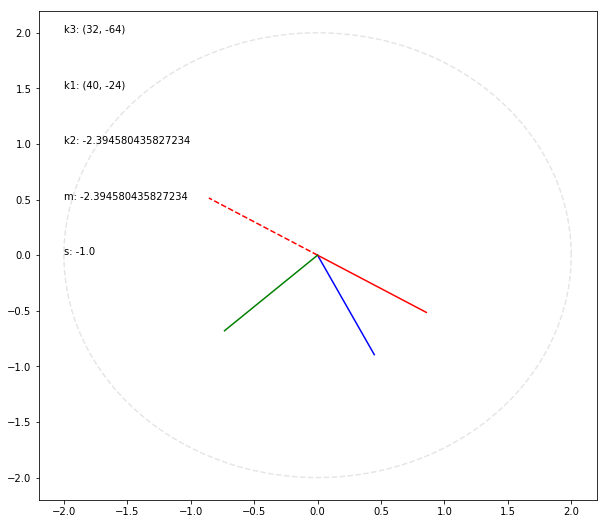

In [99]:
k3x_l = [32]
k3y_l = [64, -64]
k1x_l = [40]
k1y_l = [24, -24]

for k3x in k3x_l:
    for k3y in k3y_l:
        k3 = np.array([k3x, k3y])
        k3 = k3/np.linalg.norm(k3)
        for k1x in k1x_l:
            for k1y in k1y_l:
                k1 = np.array([k1x, k1y])
                k1 = k1/np.linalg.norm(k1)
                k2 = k3 - k1
                k2x = k2[0]
                k2y = k2[1]
                pre_fac = k1x*k2y - k2x*k1y
                k2 =  k2 / np.linalg.norm(k2)
                plt.figure(figsize = (10, 9))
                plt.plot(x, y, 'k--', alpha = 0.1)
                plt.plot([0, k3[0]], [0, k3[1]], 'b')
                plt.plot([0, k1[0]], [0, k1[1]], 'r')
                plt.plot([0, -k1[0]], [0, -k1[1]], 'r--')
                plt.plot([0, k2[0]], [0, k2[1]], 'g')
                plt.text(x = -2, y = 2, s =  "k3: ({}, {})".format(k3x, k3y))
                plt.text(x = -2, y = 1.5, s =  "k1: ({}, {})".format(k1x, k1y))
                plt.text(x = -2, y = 1, s =  "k2: {}".format(vec_angle(k2)))
                plt.text(x = -2, y = 0.5, s = "m: {}".format((vec_angle(k3) + vec_angle(k1) + np.sign(k1x*k2y - k2x*k1y)*np.pi)/2))
                plt.text(x = -2, y = 0.0, s = "s: {}".format(np.sign(pre_fac)))
                
                plt.show()

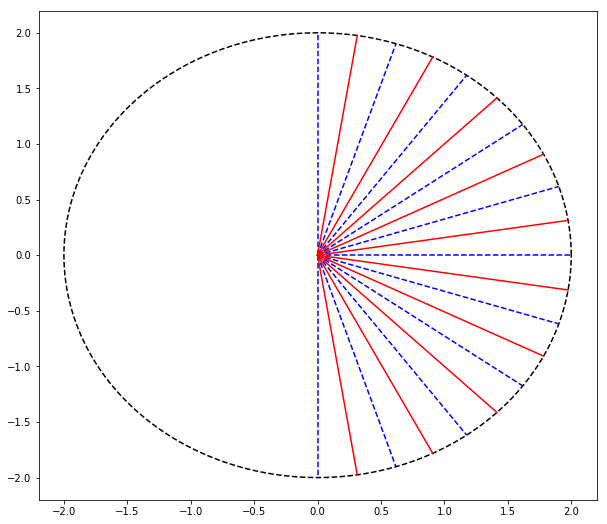

In [125]:
n_theta   = 10
dtheta    = np.pi / n_theta
theta     = np.arange(-np.pi/2, np.pi/2 + dtheta, dtheta)
mid_theta = (theta[1:] + theta[:-1]) * 0.5

plt.figure(figsize = (10, 9))
plt.plot(x, y, 'k--')
for a in range(theta.shape[0]):
    plt.plot([0, R*np.cos(theta[a])], [0, R*np.sin(theta[a])], 'b--')
for a in range(mid_theta.shape[0]):
    plt.plot([0, R*np.cos(mid_theta[a])], [0, R*np.sin(mid_theta[a])], 'r')

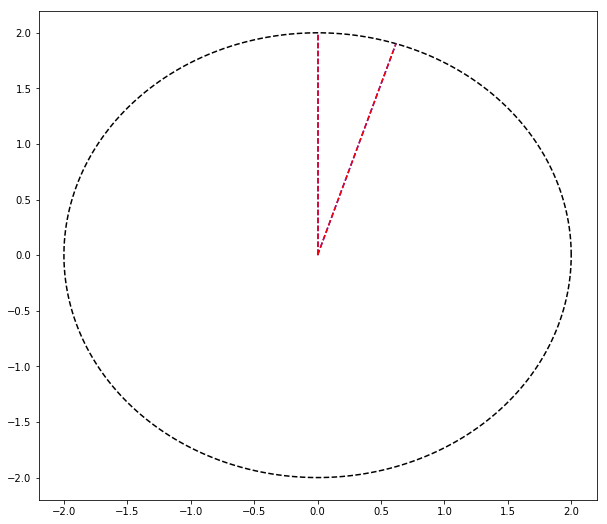

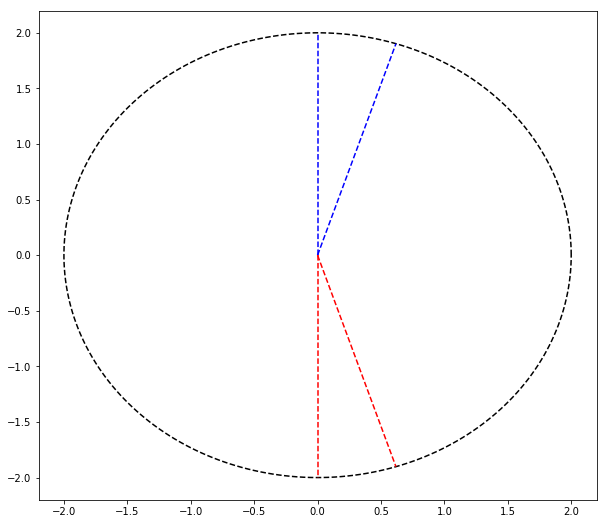

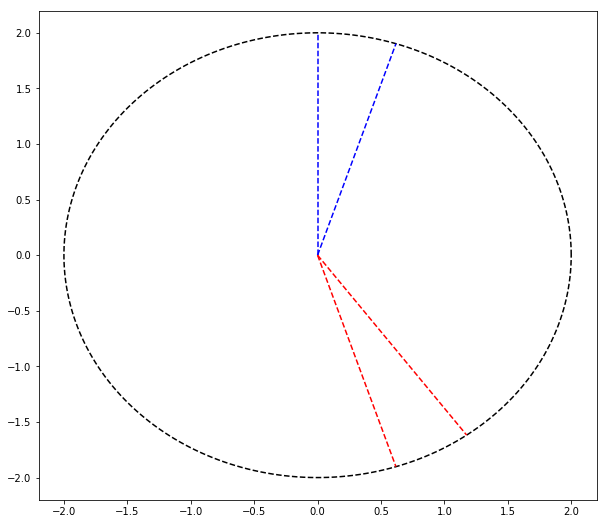

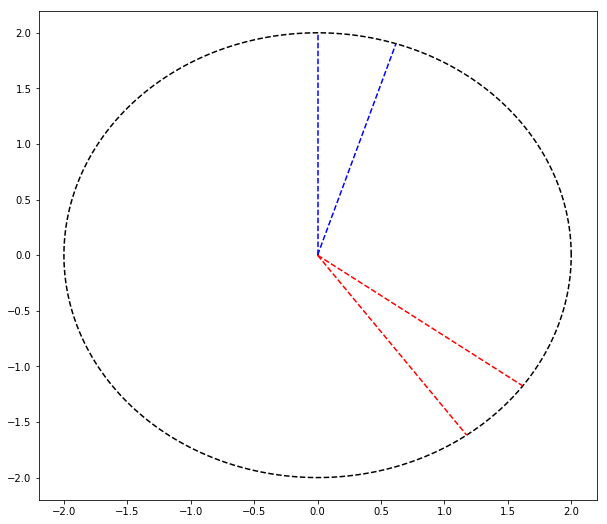

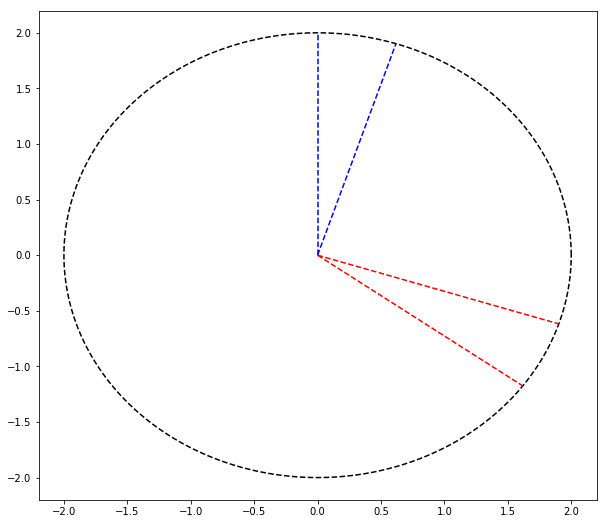

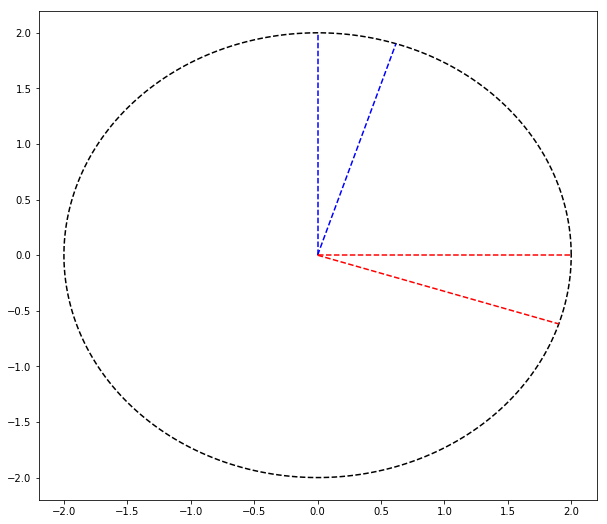

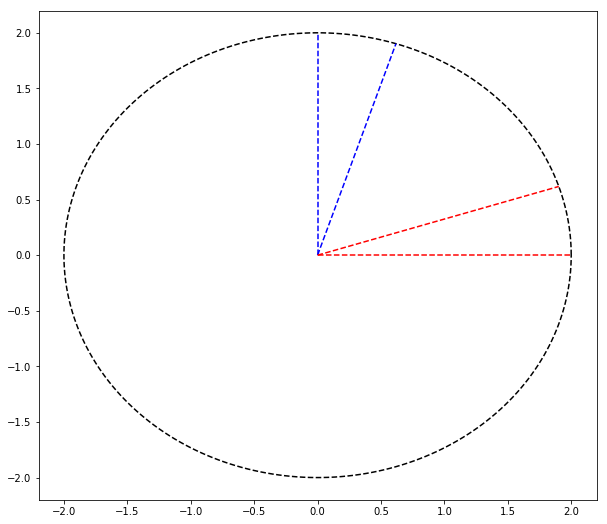

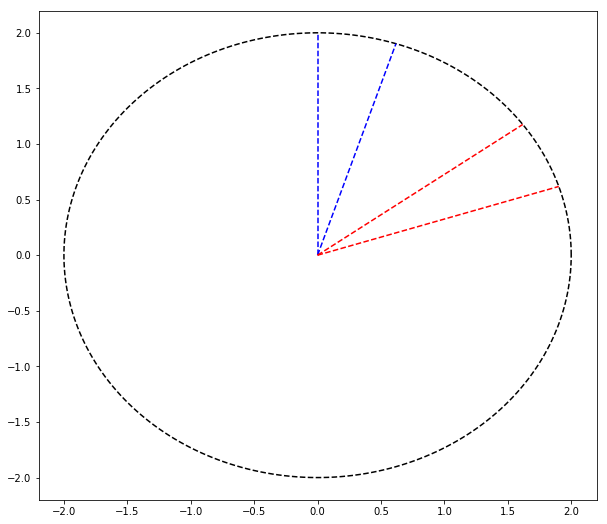

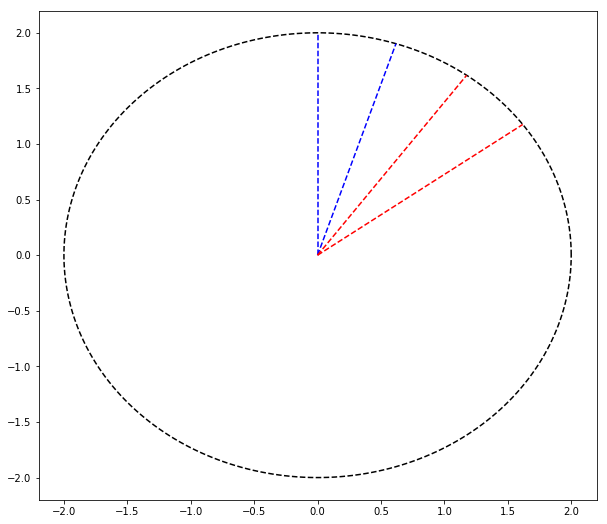

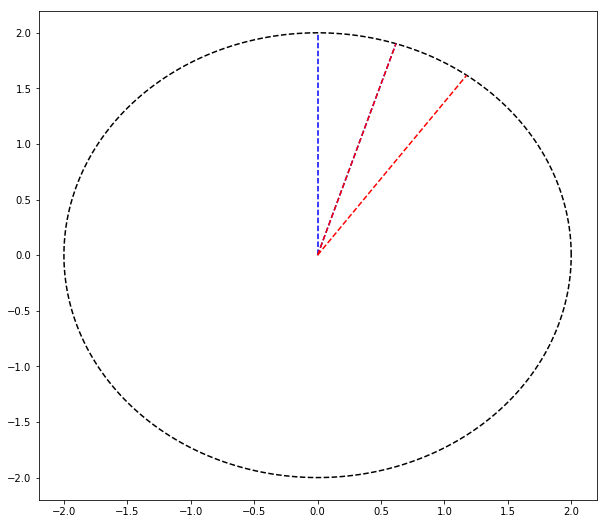

In [132]:
n_theta   = 10
dtheta    = np.pi / n_theta
theta     = np.arange(-np.pi/2, np.pi/2 + dtheta, dtheta)
mid_theta = (theta[1:] + theta[:-1]) * 0.5

a = n_theta - 1
for l in range(mid_theta.shape[0]):
    plt.figure(figsize = (10, 9))
    plt.plot(x, y, 'k--')
    plt.plot([0, R*np.cos(theta[a])], [0, R*np.sin(theta[a])], 'b--')
    plt.plot([0, R*np.cos(theta[a + 1])], [0, R*np.sin(theta[a + 1])], 'b--')
    plt.plot([0, R*np.cos(mid_theta[np.mod(a + l, n_theta)] - dtheta/2)], [0, R*np.sin(mid_theta[np.mod(a + l, n_theta)] - dtheta/2)], 'r--')
    plt.plot([0, R*np.cos(mid_theta[np.mod(a + l, n_theta)] + dtheta/2)], [0, R*np.sin(mid_theta[np.mod(a + l, n_theta)] + dtheta/2)], 'r--')

#     plt.plot([0, R*np.cos(mid_theta[a + 1] - dtheta)], [0, R*np.sin(mid_theta[a + 1])], 'r--')
#     if l - 1 == n_theta + 1:
#         plt.plot([0, R*np.cos(theta[0])], [0, R*np.sin(theta[0])], 'r--')    
#         plt.plot([0, R*np.cos(theta[1])], [0, R*np.sin(theta[1])], 'r--')
#     else:
#         plt.plot([0, R*np.cos(theta[np.mod(a + l, n_theta + 1)])], [0, R*np.sin(theta[np.mod(a + l, n_theta + 1)])], 'r--')
#         plt.plot([0, R*np.cos(theta[np.mod(a + 1 + l, n_theta + 1)])], [0, R*np.sin(theta[np.mod(a + 1 + l, n_theta + 1)])], 'r--')            